In [81]:
install.packages("spatstat")

Installing package into ‘/home/mason/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [82]:
library(spatstat)

In [83]:
data <- read.csv("/tmp/first_100.csv")

In [84]:
P <- ppp(data$x, data$y, owin(c(0, 10000), c(0, 1000)))

Warning message:
“89 points were rejected as lying outside the specified window”


In [85]:
options(repr.plot.width=12, repr.plot.height=12)

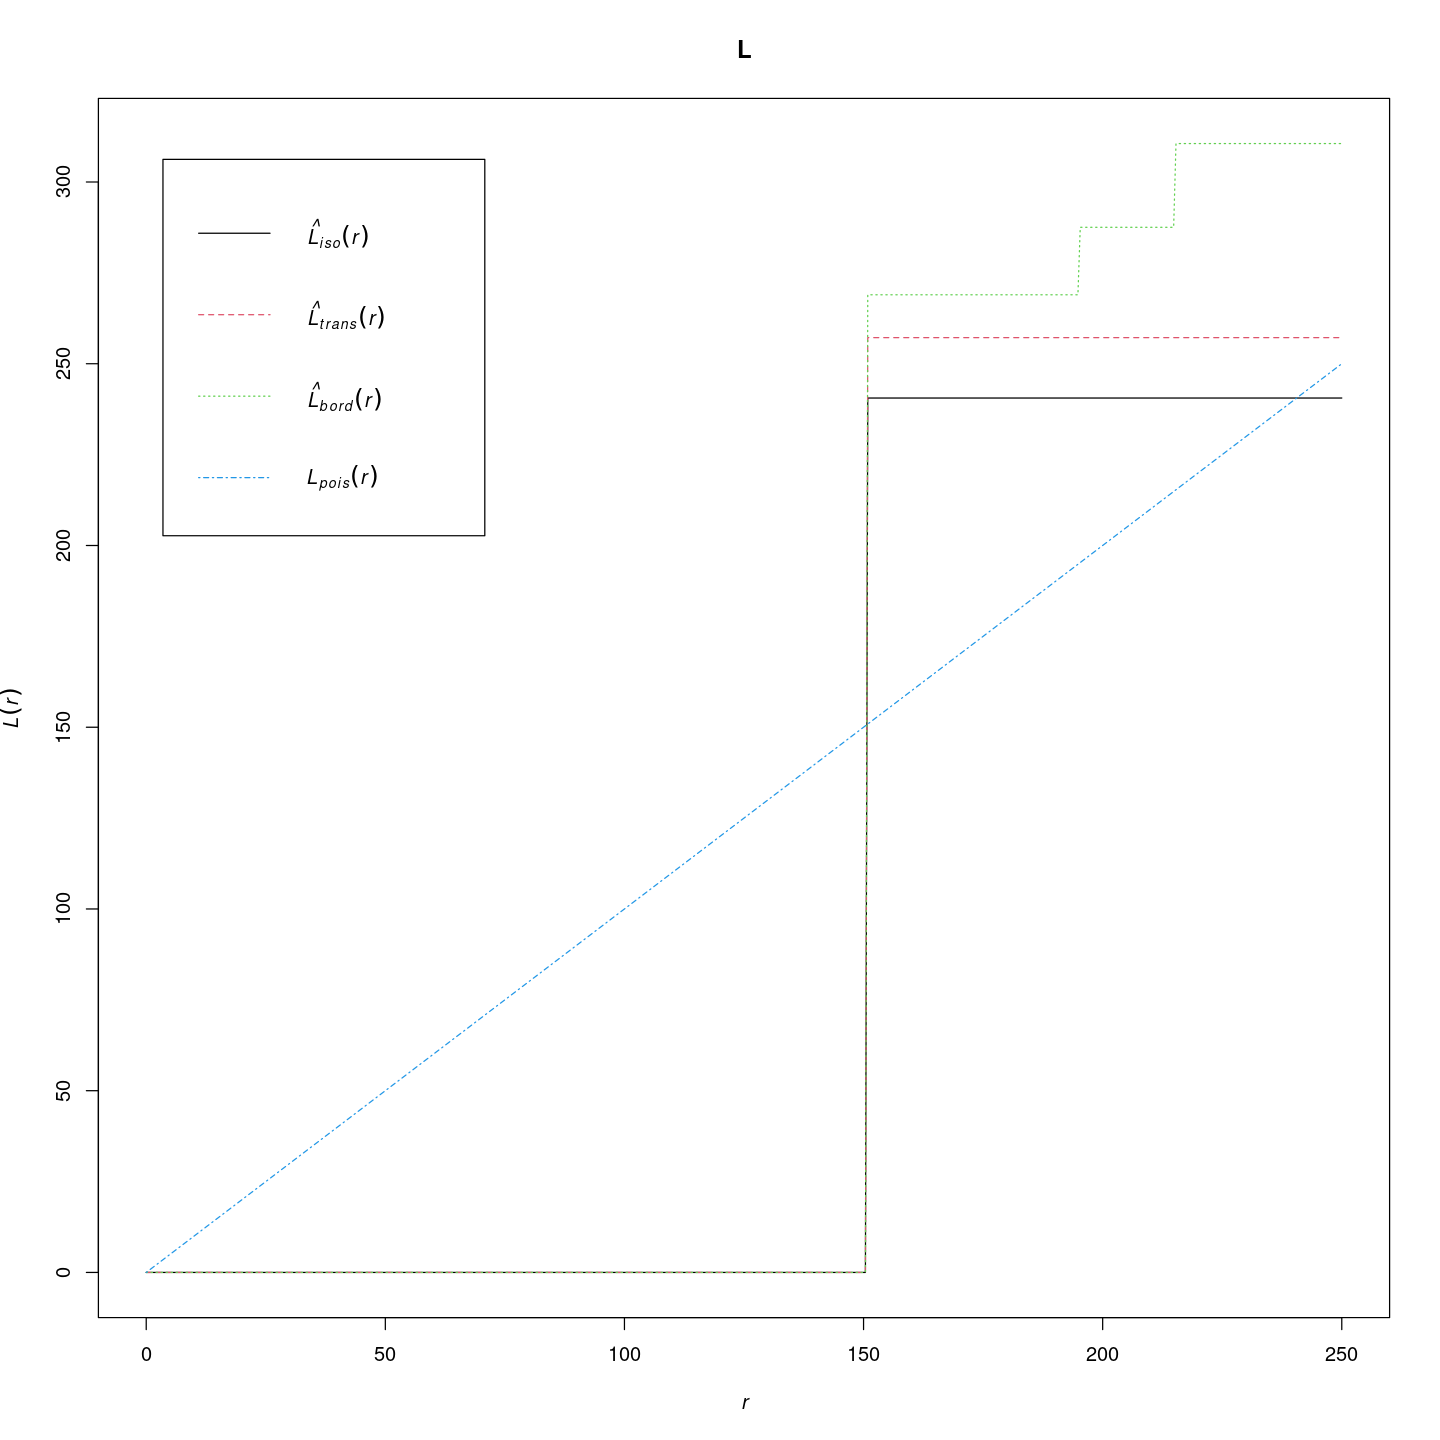

In [86]:
L <- Lest(P)
plot(L)

Warning message:
“2984 points were rejected as lying outside the specified window”


Generating 500 simulations of CSR  ...
1, 2, 3, .5....10....15....20....25....30....35....40....45....50....55...
.60....65....70....75....80....85....90....95....100....105....110....115.
...120....125....130....135....140....145....150....155....160....165....170....
175....180....185....190....195....200....205....210....215....220....225....230..
..235....240....245....250....255....260....265....270....275....280....285....290
....295....300....305....310....315....320....325....330....335....340....345...
.350....355....360....365....370....375....380....385....390....395....400....405.
...410....415....420....425....430....435....440....445....450....455....460....
465....470....475....480....485....490....495.... 500.

Done.


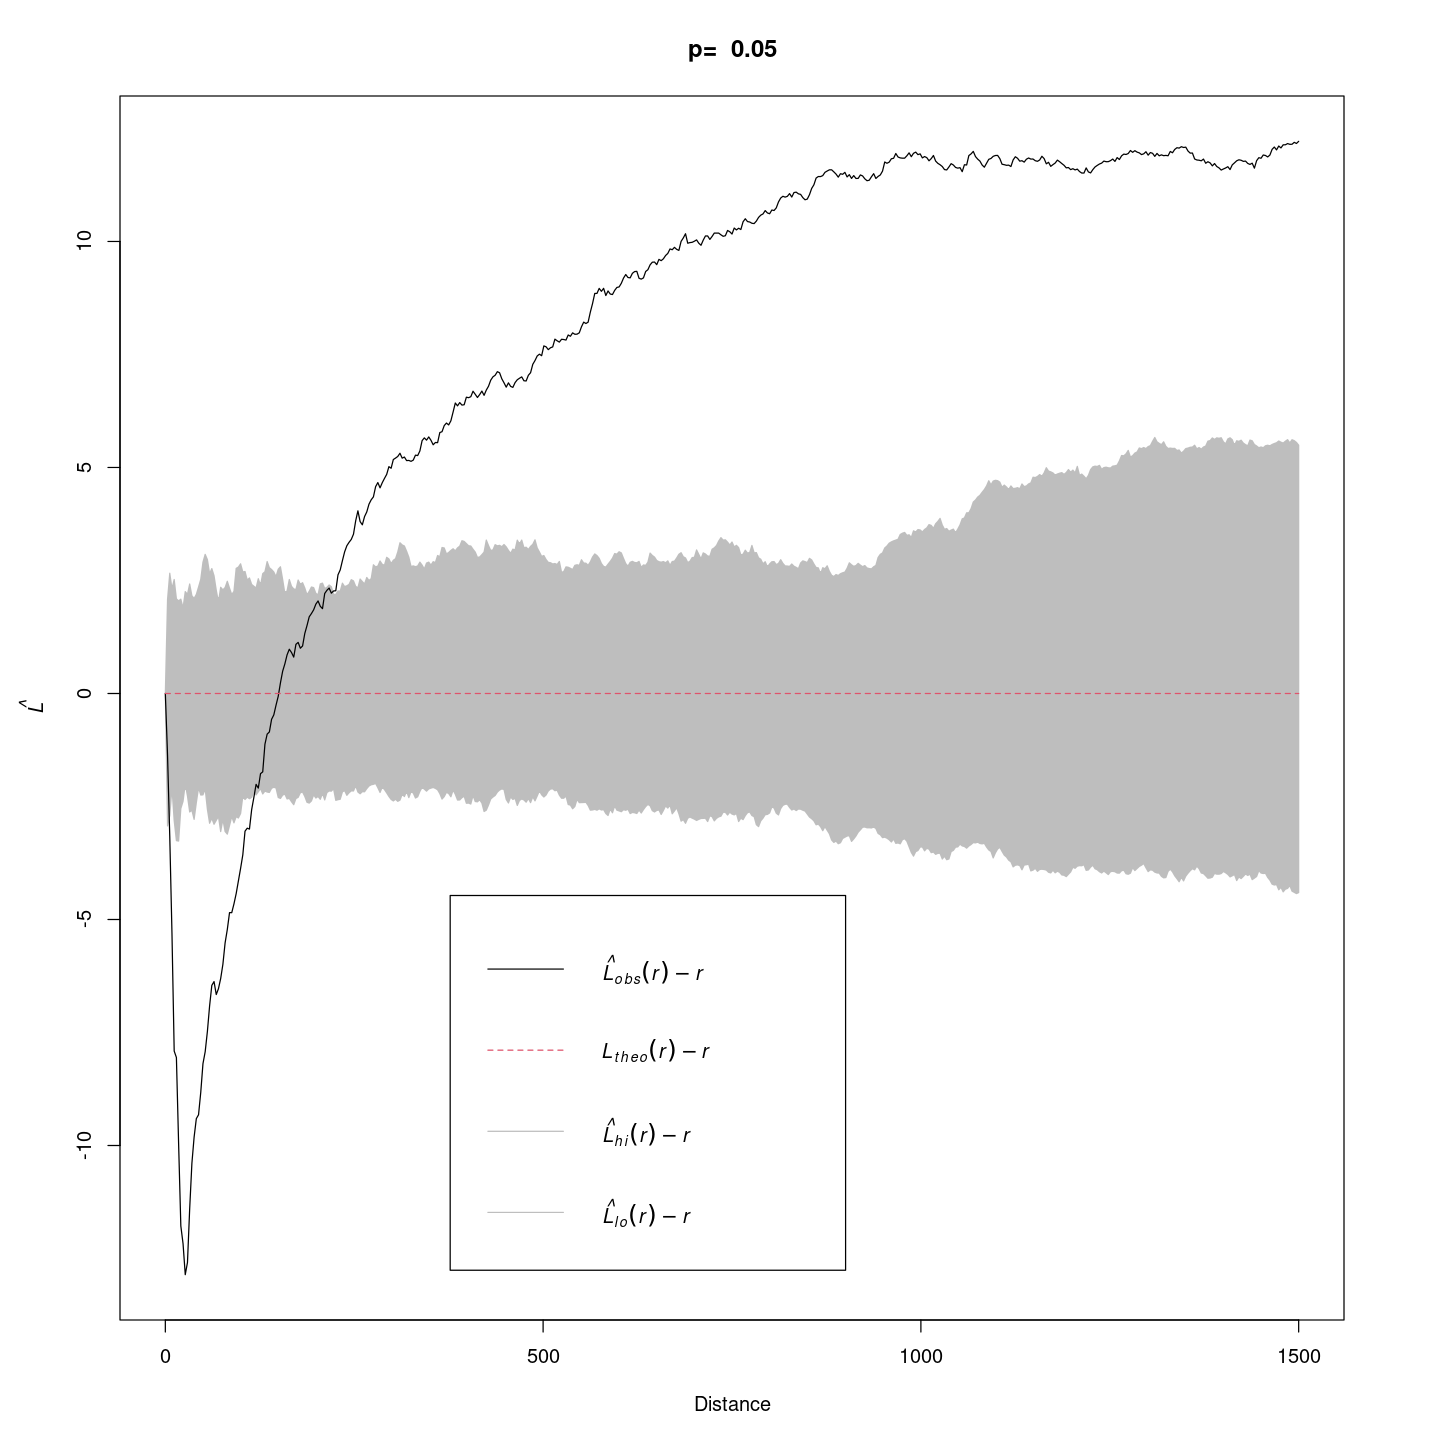

In [146]:
# sim_dir <- "ccd_1.087_0.700_8.996_1.102"
sim_dir <- "ccd_1.500_0.700_3.000_2.050"
# sim_dir <- "ccd_1.505_0.499_5.952_1.104"

# Choices: n.craters in [100, 250, 500, 1000, 2000, 3000, 4000, 5000, 7500, 10000, 50000]
n.craters <- 10000

data <- read.csv(paste("/tmp/", sim_dir, "_", n.craters, ".csv", sep=""))
P <- ppp(data$x, data$y, owin(c(0, 10000), c(0, 10000)))

n <- 500
p  <- 0.05 # Desired p significance level to display
EL <- envelope(P, Lest, nsim=n, rank=(p * (n + 1)), rmax=1500, global=FALSE)
OP <- par(mar=c(5,5,4,4))
plot(EL, . - r ~ r, ylab=expression(hat("L")),xlab="Distance", main=paste("p= ",p))
par(OP)

In [76]:
?envelope

envelope {spatstat.explore},R Documentation
Y,"Object containing point pattern data. A point pattern (object of class ""ppp"") or a fitted point process model (object of class ""ppm"", ""kppm"" or ""slrm"")."
fun,Function that computes the desired summary statistic for a point pattern.
nsim,Number of simulated point patterns to be generated when computing the envelopes.
nrank,Integer. Rank of the envelope value amongst the nsim simulated values. A rank of 1 means that the minimum and maximum simulated values will be used.
...,Extra arguments passed to fun.
funargs,"A list, containing extra arguments to be passed to fun."
funYargs,"Optional. A list, containing extra arguments to be passed to fun when applied to the original data Y only."
simulate,"Optional. Specifies how to generate the simulated point patterns. If simulate is an expression in the R language, then this expression will be evaluated nsim times, to obtain nsim point patterns which are taken as the simulated patterns from which the envelopes are computed. If simulate is a function, then this function will be repeatedly applied to the data pattern Y to obtain nsim simulated patterns. If simulate is a list of point patterns, then the entries in this list will be treated as the simulated patterns from which the envelopes are computed. Alternatively simulate may be an object produced by the envelope command: see Details."
fix.n,"Logical. If TRUE, simulated patterns will have the same number of points as the original data pattern. This option is currently not available for envelope.kppm."
fix.marks,"Logical. If TRUE, simulated patterns will have the same number of points and the same marks as the original data pattern. In a multitype point pattern this means that the simulated patterns will have the same number of points of each type as the original data. This option is currently not available for envelope.kppm."
